# Image Recognition with CNN

- In this study we will apply convolutional neural networks to recognize the images of handwritten numbers. 
- We will use the Mnist database from the Keras library that has a training set of 60,000 examples, and a test set of 10,000 examples.
- The images are centered and have 28x28 pixels in size and each has a value between 0 and 255, where 0 means background (white), 255 means foreground (black).
- The data is stored in a format designed for storing vectors and multidimensional matrices.

## Imports

In [1]:
# Advanced mathematical functions
import numpy as np

# To make plots
import matplotlib.pyplot as plt

# To get darabase
from keras.datasets import mnist
# To change output data
from keras.utils import to_categorical
# To create a model with keras
from keras.models import Sequential
# To configure convolutional layers
from keras.layers import Conv2D
# To configure grouping layers
from keras.layers import MaxPooling2D
# To prepare data before hidden layers
from keras.layers import Flatten
# To configure Dropout layers
from keras.layers import Dropout
# To configure hidden layers
from keras.layers import Dense

# Explore Data

In [2]:
# With the Keras mnist function we can split our data for training and validation
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Now we have 4 arrays with the data splitted
print(type(x_train),type(y_train),type(x_test),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
# x_... is an array with 3 position.
# The first dimension indexes images
# The next two dimensions correspond to the pixels information in each image.
print('x_train:',x_train.shape,'   x_test:',x_test.shape)

x_train: (60000, 28, 28)    x_test: (10000, 28, 28)


In [5]:
# y_... contains the real number
print('y_train:',y_train.shape,'   y_test:',y_test.shape)

y_train: (60000,)    y_test: (10000,)


In [6]:
# Here we can see the first number with an array of 28x28
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# Here we can see the first real number
y_train[0]

5

(-0.5, 27.5, 27.5, -0.5)

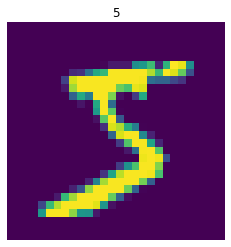

In [8]:
# Now let's try to display the image
# The function -imshow- display 2D scalar data as an image
plt.imshow(x_train[0])
plt.title(y_train[0])
# No need to display coordinates
plt.axis('off')

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

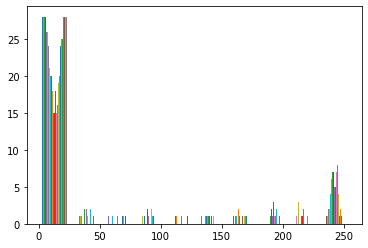

In [9]:
# Lets see the distribution on one number
plt.hist(x_train[0])

# Prepare input & output data

- Neural networks don't process raw data, like text files, encoded JPEG image files, or CSV files. They process vectorized & standardized representations.

## Input

- In general, input values to a neural network should be close to zero, we expect either data with zero-mean and unit-variance, or data in the 0-1 range.

In [10]:
# We know that our numbers are between 0-255, so we will divide everything by 255 to get them to be between 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

- We must reshape the training and validation images, to explicitly indicate to Keras that each image will have a single information channel (because they are grayscale images).

In [11]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

## Output

- Our labels for each input data are numbers between 0-9 that indicate which digit represents the image. We will represent this label with a vector of 10 positions, where the position corresponding to the digit that represents the image contains a 1 and the remaining positions of the vector contain the value 0.

- We will use one-hot encoding which consists of transforming the labels into a vector of as many zeros as the number of different labels, and containing the value of 1 in the index that corresponds to the value of the label. With Keras we can use the function to_categorical to perform this transformation.

- After doing that, the values from the output neurons, which are probabilities ranging from 0 to 1, can be compared directly to the values in the target vector. In this way, for a given number, say 0, the neural network will be trained to output a high probability from the first output neuron, and a low probability from the following neurons.



In [12]:
# num_classes is the number of possibilities of the output
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Creating a neural network model

## Defining the model

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

In [13]:
# The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers
model = Sequential()

### Convolutional layers

- Convolutional layers apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input.
- The number of filters we want to use will depend on the number of features we want to extract and the complexity of the image.
- Common choice is to keep the kernel size at 3x3 or 5x5.
- Relu is the most used activation method for the hidden layers and image recognition
- In our study we do not need to modify the padding or the stride. By default, Keras will use padding equal to 0 and stride equal to 1.

In [14]:
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))

- The addition of a pooling layer after the convolutional layer is a common pattern used for ordering layers within a convolutional neural network.
- The result of using a pooling layer and creating down sampled or pooled feature maps is a summarized version of the features detected in the input.
- The size of the pooling operation or filter is smaller than the size of the feature map it is almost always 2×2 applied with a stride of 2 pixels.
- In our study we do not need to modify the padding or the stride. By default, Keras will use padding equal to 0 and stride equal to 2.

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

### Dense layers

- Dense layers require data input as a 1-dimensional (1D) vector. Keras provides us with the flatten function to perform the conversion.

In [16]:
model.add(Flatten())

- In a dense layer, all neurons in each layer are connected to all neurons in the next layer.
- We will use a single dense hidden layer since it is capable of performing most of the calculations we need.
- One of the unwritten rules about neurons says that the number of hidden neurons should be between the size of the input layer and the size of the output layer.
- The second dense layer is the one we will use as the output layer. The neurons of this layer must always be equal to the different output options.
- Relu is the most used activation method for the hidden layers and image recognition and softmax is the most used for the output layer.

In [17]:
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

- The function summary is a very useful method that Keras provides to check the architecture of our model.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               144100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 145,370
Trainable params: 145,370
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

- Once we have our model defined, we can configure how its learning process will be with the function compile
- The first of these arguments is the loss function that we will use to evaluate the degree of error between calculated outputs and the desired outputs of the training data.
-  Later we specify an optimizer that allows the neural network to calculate the weights of the parameters from the input data and the defined loss function.
- Finally we must indicate the metric that we will use to monitor the learning process (and test) of our neural network.
- Categorical_crossentropy, adam and accuracy, are the most used methods for image recognition.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

## Training the model

- Once our model has been defined and the learning method configured, it is ready to be trained.
- In the first two arguments we have indicated the data with which we will train the model.
- The batch_size argument indicates the number of data that we will use for each update of the model parameters and with epochs we are indicating the number of times we will use all the data in the learning process.
- verbose = 1 allows us to see the process
- In each iteration of this algorithm, it takes training data from x_train, passes them through the neural network, compares the obtained result with the expected one (indicated in y_train) and calculates the loss to guide the adjustment process of the model parameters, which consists to applying the optimizer in the compile() method to calculate a new value of each one of the model parameters (weights and biases)in each iteration in such a way that the loss is reduced.
- Keras provides the capability to register callbacks when training a deep learning model. One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch.

In [20]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
600/600 [==============================] - 14s 24ms/step - loss: 0.2385 - accuracy: 0.9326 - val_loss: 0.0865 - val_accuracy: 0.9736
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 3/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0545 - accuracy: 0.9840 - val_loss: 0.0637 - val_accuracy: 0.9781
Epoch 4/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 5/10
600/600 [==============================] - 14s 23ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0449 - val_accuracy: 0.9859
Epoch 6/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 7/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0403 - val_accuracy:

## Evaluating the model

- Once our model has been trained can be evaluated using the function evaluation.
- This method returns two values that indicate how well or badly our model behaves with new data that it has never seen.

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9884


In [22]:
print('Accuracy model:', round(test_acc*100,2),'%')

Accuracy model: 98.84 %


- We have previously saved our training in the history variable. We can now plot the evolution of the accuracy as a function of the training evolution. The accuracy is computed for both the training and the test samples.

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- We see that the accuracy on the training sample (blue) continuously improves: the network gets better and better at recognizing the digits of this sample, because it's trained to do it.
- But the accuracy on the testing sample (orange), which is not used for training, plateaus very early at about 98.5%. Training further will not help.
- That's a clear sign of overfitting.

<Figure size 432x288 with 0 Axes>

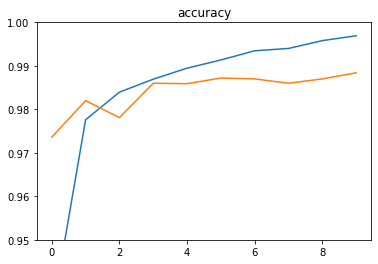

<Figure size 432x288 with 0 Axes>

In [24]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0.95, 1.0)
plt.title('accuracy') 
plt.figure()

<Figure size 432x288 with 0 Axes>

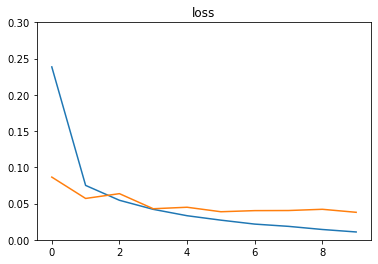

<Figure size 432x288 with 0 Axes>

In [25]:
# We can also see that the trend in the error function follows the same pattern
acc = history.history['loss']
test_acc = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0, 0.3)
plt.title('loss') 
plt.figure()

## Deal with overfit

- To try to deal with the overfit we will add a Dropout layer.
- The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
- Dropout is often used  after pooling layers (eg MaxPooling2D).
- We will create a new model with a Dropout layer and see if it improves the result

In [26]:
# Definig model model
model_drop = Sequential()
model_drop.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model_drop.add(MaxPooling2D(pool_size=(2,2)))
model_drop.add(Flatten())
    # We will make it discard half of the inputs
model_drop.add(Dropout(rate=0.5))
model_drop.add(Dense(100,activation='relu'))
model_drop.add(Dense(10, activation='softmax'))
# Compiling the model
model_drop.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# Training the model
history_drop = model_drop.fit(x_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(x_test,y_test))


Epoch 1/10
600/600 [==============================] - 19s 31ms/step - loss: 0.3281 - accuracy: 0.9014 - val_loss: 0.0990 - val_accuracy: 0.9711
Epoch 2/10
600/600 [==============================] - 17s 29ms/step - loss: 0.1285 - accuracy: 0.9605 - val_loss: 0.0681 - val_accuracy: 0.9781
Epoch 3/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0959 - accuracy: 0.9702 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 4/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 0.0488 - val_accuracy: 0.9831
Epoch 5/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0692 - accuracy: 0.9785 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 6/10
600/600 [==============================] - 18s 29ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0361 - val_accuracy: 0.9879
Epoch 7/10
600/600 [==============================] - 17s 29ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0334 - val_accuracy:

<Figure size 432x288 with 0 Axes>

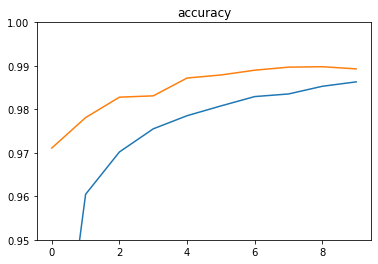

<Figure size 432x288 with 0 Axes>

In [27]:
#Results
acc = history_drop.history['accuracy']
test_acc = history_drop.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0.95, 1.0)
plt.title('accuracy') 
plt.figure()

<Figure size 432x288 with 0 Axes>

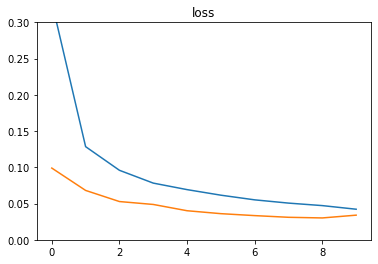

<Figure size 432x288 with 0 Axes>

In [28]:
acc = history_drop.history['loss']
test_acc = history_drop.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0, 0.3)
plt.title('loss') 
plt.figure()

In [29]:
# Only show the last epoch of each measurement
print('Model 1 ->  Accuracy train :', round(history.history['accuracy'][9]*100,2),'%',
     '    Accuracy validation:', round(history.history['val_accuracy'][9]*100,2),'%')
print('Model 2 ->  Accuracy train :', round(history_drop.history['accuracy'][9]*100,2),'%',
     '   Accuracy validation:', round(history_drop.history['val_accuracy'][9]*100,2),'%')

Model 1 ->  Accuracy train : 99.69 %     Accuracy validation: 98.84 %
Model 2 ->  Accuracy train : 98.63 %    Accuracy validation: 98.93 %


In [30]:
print('Model 1 ->  Loss train :', round(history.history['loss'][9]*100,2),'%',
     '    Loss validation:', round(history.history['val_loss'][9]*100,2),'%')
print('Model 2 ->  Loss train :', round(history_drop.history['loss'][9]*100,2),'%',
     '   Loss validation:', round(history_drop.history['val_loss'][9]*100,2),'%')

Model 1 ->  Loss train : 1.08 %     Loss validation: 3.79 %
Model 2 ->  Loss train : 4.22 %    Loss validation: 3.4 %


- If we look at the results we can see how we have worsened in the training measurements, but we have improved in validation measurements, which is something positive for us. Now it is better with the new inputs that arrive.

## Experimenting

- The hyperparameters are the parameters affecting the network configuration, such as the number of layers, the number of neurons per layer, the number of features extracted by the convolutional layers, etc.
- We can try and improve the performance by tuning the hyperparameters.


In [31]:
# Definig model model
model_exp = Sequential()
model_exp.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model_exp.add(MaxPooling2D(pool_size=(2,2)))
model_exp.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_exp.add(MaxPooling2D(pool_size=(2,2)))
model_exp.add(Flatten())
    # We will make it discard half of the inputs
model_exp.add(Dropout(rate=0.4))
model_exp.add(Dense(100,activation='relu'))
model_exp.add(Dense(10, activation='softmax'))
# Compiling the model
model_exp.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# Training the model
history_exp = model_exp.fit(x_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(x_test,y_test))


Epoch 1/10
600/600 [==============================] - 26s 44ms/step - loss: 0.2688 - accuracy: 0.9185 - val_loss: 0.0569 - val_accuracy: 0.9823
Epoch 2/10
600/600 [==============================] - 28s 46ms/step - loss: 0.0843 - accuracy: 0.9744 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 3/10
600/600 [==============================] - 28s 46ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0317 - val_accuracy: 0.9887
Epoch 4/10
600/600 [==============================] - 28s 46ms/step - loss: 0.0519 - accuracy: 0.9841 - val_loss: 0.0245 - val_accuracy: 0.9915
Epoch 5/10
600/600 [==============================] - 26s 44ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0267 - val_accuracy: 0.9906
Epoch 6/10
600/600 [==============================] - 25s 42ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0234 - val_accuracy: 0.9923
Epoch 7/10
600/600 [==============================] - 26s 43ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0249 - val_accuracy:

<Figure size 432x288 with 0 Axes>

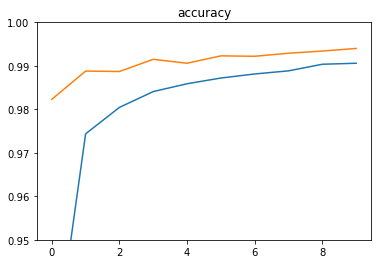

<Figure size 432x288 with 0 Axes>

In [32]:
#Results
acc = history_exp.history['accuracy']
test_acc = history_exp.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0.95, 1.0)
plt.title('accuracy') 
plt.figure()

<Figure size 432x288 with 0 Axes>

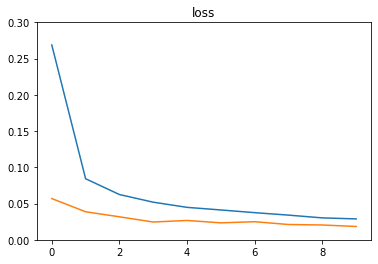

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history_exp.history['loss']
test_acc = history_exp.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.ylim(0, 0.3)
plt.title('loss') 
plt.figure()

In [34]:
# Only show the last epoch of each measurement
print('Model 1 ->  Accuracy train :', round(history.history['accuracy'][9]*100,2),'%',
     '    Accuracy validation:', round(history.history['val_accuracy'][9]*100,2),'%')
print('Model 2 ->  Accuracy train :', round(history_drop.history['accuracy'][9]*100,2),'%',
     '   Accuracy validation:', round(history_drop.history['val_accuracy'][9]*100,2),'%')
print('Model 3 ->  Accuracy train :', round(history_exp.history['accuracy'][9]*100,2),'%',
     '   Accuracy validation:', round(history_exp.history['val_accuracy'][9]*100,2),'%')

Model 1 ->  Accuracy train : 99.69 %     Accuracy validation: 98.84 %
Model 2 ->  Accuracy train : 98.63 %    Accuracy validation: 98.93 %
Model 3 ->  Accuracy train : 99.06 %    Accuracy validation: 99.4 %


In [35]:
print('Model 1 ->  Loss train :', round(history.history['loss'][9]*100,2),'%',
     '   Loss validation:', round(history.history['val_loss'][9]*100,2),'%')
print('Model 2 ->  Loss train :', round(history_drop.history['loss'][9]*100,2),'%',
     '    Loss validation:', round(history_drop.history['val_loss'][9]*100,2),'%')
print('Model 3 ->  Loss train :', round(history_exp.history['loss'][9]*100,2),'%',
     '   Loss validation:', round(history_exp.history['val_loss'][9]*100,2),'%')

Model 1 ->  Loss train : 1.08 %    Loss validation: 3.79 %
Model 2 ->  Loss train : 4.22 %     Loss validation: 3.4 %
Model 3 ->  Loss train : 2.88 %    Loss validation: 1.84 %


- After a long time trying different combinations we get the best results with 4 convolutional layers (2 to extract features and 2 to reduce the data) and 2 dense layers (1 for information processing and 1 for the output layer).

In [36]:
print('                     \033[4mBest Model\033[0m \n')
print('Accuracy train :', round(history_exp.history['accuracy'][9]*100,2),'%',
     '   Accuracy validation:', round(history_exp.history['val_accuracy'][9]*100,2),'%')
print('Loss train :', round(history_exp.history['loss'][9]*100,2),'%',
     '        Loss validation:', round(history_exp.history['val_loss'][9]*100,2),'%')

                     Best Model 

Accuracy train : 99.06 %    Accuracy validation: 99.4 %
Loss train : 2.88 %         Loss validation: 1.84 %


## Testing the model

- Finally we will test our model. Our goal is to predict which digit represents each image. Keras provides us with the predict function.
- The predict() method return a vector with the predictions for the whole dataset elements. We can know which class gives the most probability of belonging by means of the argmax function of Numpy, which returns the index of the position that contains the highest value of the vector.

In [37]:
pred = model_exp.predict(x_test)

(-0.5, 27.5, 27.5, -0.5)

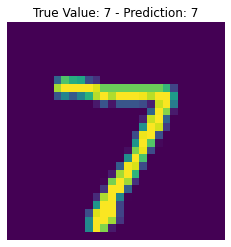

In [38]:
# Lets do some predictions
plt.imshow(x_test[0])
plt.title(f'True Value: {np.argmax(y_test[0])} - Prediction: {np.argmax(pred[0])}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

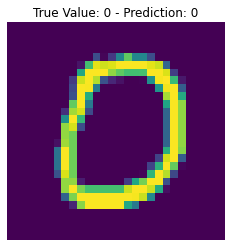

In [39]:
#Lets do some predictions
plt.imshow(x_test[10])
plt.title(f'True Value: {np.argmax(y_test[10])} - Prediction: {np.argmax(pred[10])}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

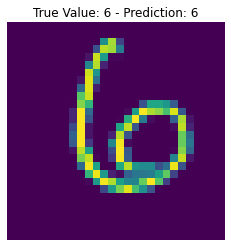

In [40]:
#Lets do some predictions
plt.imshow(x_test[100])
plt.title(f'True Value: {np.argmax(y_test[100])} - Prediction: {np.argmax(pred[100])}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

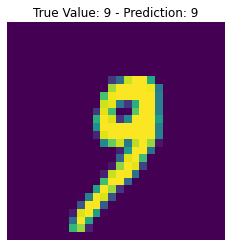

In [41]:
#Lets do some predictions
plt.imshow(x_test[1000])
plt.title(f'True Value: {np.argmax(y_test[1000])} - Prediction: {np.argmax(pred[1000])}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

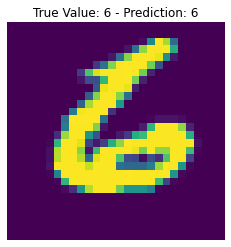

In [42]:
#Lets do some predictions
plt.imshow(x_test[9999])
plt.title(f'True Value: {np.argmax(y_test[9999])} - Prediction: {np.argmax(pred[9999])}')
plt.axis('off')

In [43]:
# Lets see some wrong predictions
pred_digits = np.argmax(pred, axis=1)
y_digits = np.argmax(y_test, axis=1)

In [51]:
mispred_img = x_test[pred_digits!=y_digits]
mispred_true = y_digits[pred_digits!=y_digits]
mispred_pred = pred_digits[pred_digits!=y_digits]
print ('Number of misclassified digits:', mispred_img.shape[0])

Number of misclassified digits: 60


(-0.5, 27.5, 27.5, -0.5)

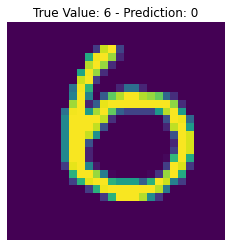

In [45]:
plt.imshow(mispred_img[0])
plt.title(f'True Value: {mispred_true[0]} - Prediction: {mispred_pred[0]}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

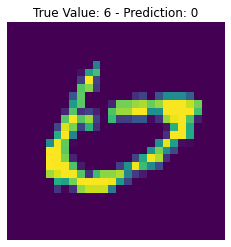

In [46]:
plt.imshow(mispred_img[1])
plt.title(f'True Value: {mispred_true[1]} - Prediction: {mispred_pred[1]}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

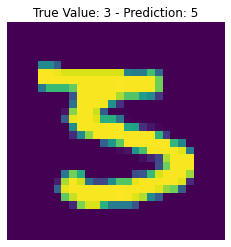

In [47]:
plt.imshow(mispred_img[2])
plt.title(f'True Value: {mispred_true[2]} - Prediction: {mispred_pred[2]}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

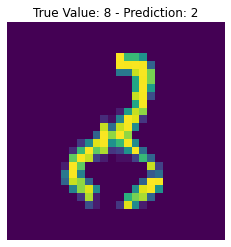

In [48]:
plt.imshow(mispred_img[3])
plt.title(f'True Value: {mispred_true[3]} - Prediction: {mispred_pred[3]}')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

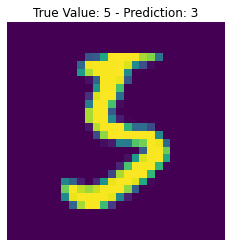

In [49]:
plt.imshow(mispred_img[4])
plt.title(f'True Value: {mispred_true[4]} - Prediction: {mispred_pred[4]}')
plt.axis('off')